# Колебания с вынужденной силой

Исследуется уравнение

$$x'' + 2 \gamma x' + \omega^2_0 \sin(x) = f(t)$$

---

## Гармонический случай

В этом пункте рассматривается гармоническая сила

$$x'' + 2 \gamma x' + \omega^2_0 \sin(x) = A \cos(\omega t),$$

где $A$ - амплитуда вынуждающей силы, $\omega$ - ее частота.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import json

In [51]:
class model:
    def __init__(self, x, v, g, w0, A, w, type, L, dx):
        self.config = {
            'model' : type,
            'initial coordinate' : x,
            'initial velocity' : v,
            'attenuation constant' : g,
            'fundamental frequency' : w0,
            'force amplitude': A,
            'force frequency': w,
            'modeling interspace' : L,
            'step of modeling' : dx,
            'write' : True,
            'print level' : 0
        }
        self.is_data = False
        self.is_energy = False
        return
    def get_data(self):
        write = open('config_file.json', 'w')
        json.dump(self.config, write, indent=4)
        write.close()
        returned = subprocess.check_output('m.exe')
        #print(returned.decode('utf-8'))
        self.data =  pd.DataFrame(np.fromfile('modeled_data.binary', dtype=np.dtype([
                ('x', np.float64), 
                ('v', np.float64), 
            ])))
        self.is_data = True
        return
    def get_energy(self):
        if self.is_data == False:
            self.get_data()
        self.energy = ((0.5 / self.config['fundamental frequency'] ** 2) * self.data.v ** 2 + 1 - np.cos(self.data.x)) / ((0.5 / self.config['fundamental frequency'] ** 2) * self.data.v[0] ** 2 + 1 - np.cos(self.data.x[0]))
        self.is_energy = True
        return
    def draw_data(self, ax):
        if self.is_data == False:
            self.get_data()
        t = np.linspace(
            0, self.config['modeling interspace'], 
            int(self.config['modeling interspace'] / self.config['step of modeling']))
        ax.plot(t, self.data.x)
        return
    def draw_energy(self, ax):
        if self.is_data == False:
            self.get_energy()
        t = np.linspace(
            0, self.config['modeling interspace'], 
            int(self.config['modeling interspace'] / self.config['step of modeling']))
        ax.plot(t, self.energy)
        return
    def draw_phase(self, ax):
        if self.is_data == False:
            self.data()
        ax.plot(self.data.x, self.data.v)
        return

def find_amplitude(x, v, g, w0, A, w):
    tmp = model(x, v, g, w0, A, w, 'rk', 25 / g, 0.01)
    tmp.get_data()
    d = tmp.data.x[int(0.5 * len(tmp.data)):]
    return d.max() - d.min()

def FR(A, g, w0, f_low, f_high, N):
    F = np.linspace(f_low, f_high, int(N))
    amp = []
    for f in F:
        amp.append(find_amplitude(x=np.pi/4, v=0, g=g, w0=w0, A=A, w=f))
    return F, np.array(amp)

### Пример выполнения программы

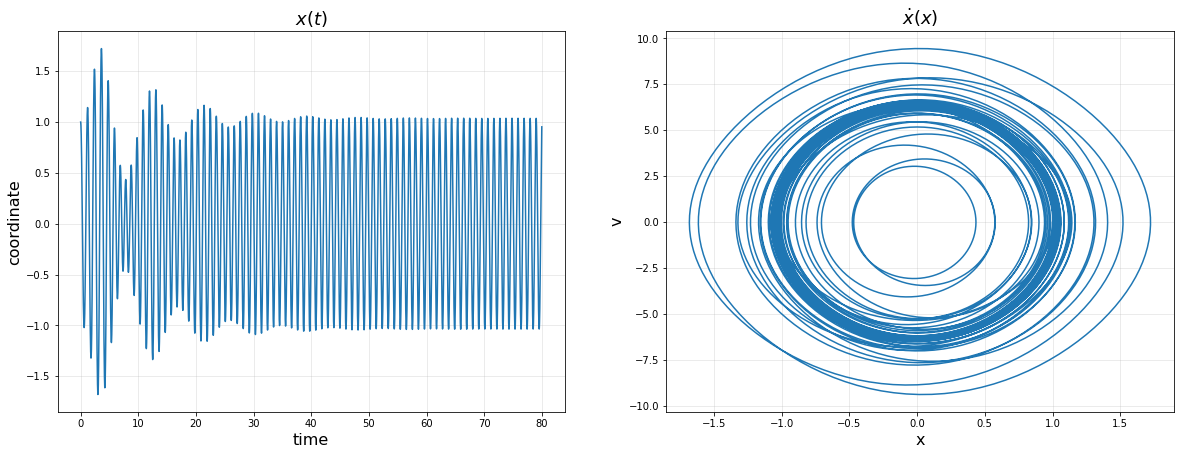

In [47]:
d = model(x=1, v=0, g=0.1, w0=6, A=5, w=6, type='rk', L=80, dx=0.01)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)

d.draw_data(ax[0])
d.draw_phase(ax[1])

ax[0].set_title('$x(t)$', fontsize=18)
ax[1].set_title('$\dot{x}(x)$', fontsize=18)

ax[0].set_xlabel('time', fontsize=16)
ax[0].set_ylabel('coordinate', fontsize=16)
ax[1].set_xlabel('x', fontsize=16)
ax[1].set_ylabel('v', fontsize=16)

ax[0].grid(True, alpha=0.3)
ax[1].grid(True, alpha=0.3)
plt.show()

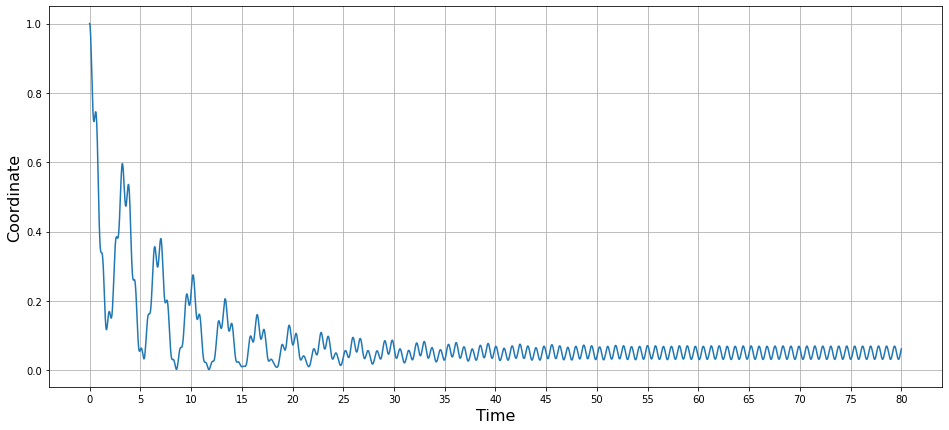

In [12]:
d = model(x=1, v=0, g=0.1, w0=6, A=5, w=4, type='rk', L=80, dx=0.01)

fig, ax = plt.subplots()
fig.set_size_inches(16,7)

d.draw_energy(ax)
ax.grid(True)

ax.set_ylabel("Coordinate", fontsize=16)
ax.set_xlabel("Time", fontsize=16)
ax.set_xticks(range(0,81,5))
plt.show()


---

## Амплитутдно-частотная характеристика

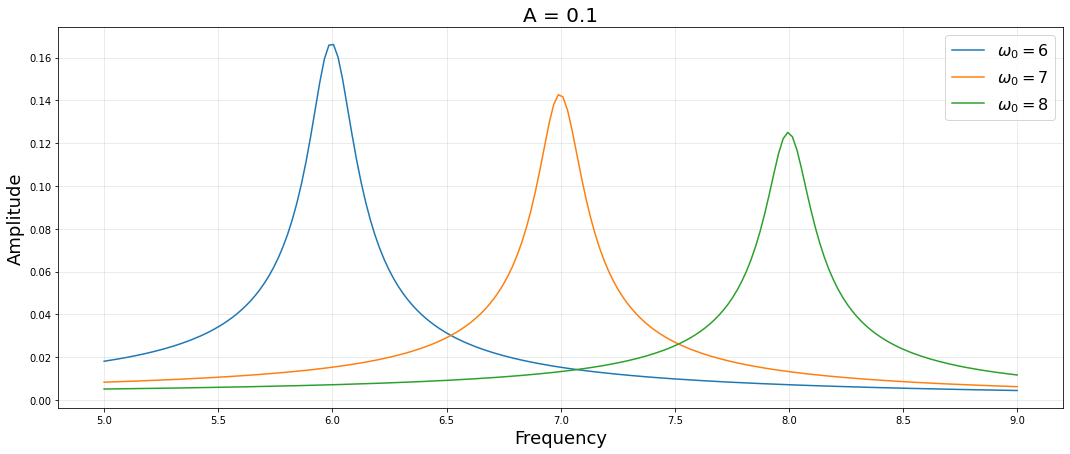

In [63]:
#x, y = FR(A=.1, g=.1, w0=6, f_low=5, f_high=7, N=100)

fig, ax = plt.subplots()
fig.set_size_inches(18,7)

x, y = FR(A=.1, g=.1, w0=6, f_low=5, f_high=9, N=200)
ax.plot(x, y, label='$\omega_0 = 6$')
x, y = FR(A=.1, g=.1, w0=7, f_low=5, f_high=9, N=200)
ax.plot(x, y, label='$\omega_0 = 7$')
x, y = FR(A=.1, g=.1, w0=8, f_low=5, f_high=9, N=200)
ax.plot(x, y, label='$\omega_0 = 8$')
#ax.plot(x, np.pi+x-x, '--')

ax.legend(loc='best', fontsize=16)
ax.set_title('A = 0.1', fontsize=20)
ax.set_xlabel('Frequency', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
ax.grid(True, alpha=.3)
plt.show()